# Visualizing Data

## Different Plots

**Bar Plots** - A bar plot can be used to compare data across different groups (x axis group, y axis value)

**Line Plots** - A line plot can be used to track data over time (x axis time, y axis value)

**Scatter Plots** - Scatter plots can be used to explore the relationship between two numeric variables (plotting x vs y)

**Box Plots** - Box plots can be used to look at the distribution of values in different groups (counting how many of each different value there are)

**Histograms** - Histograms are also used to visualize the distribution of values

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the built-in "attention" dataset
attention_df = sns.load_dataset("iris")

<img src="Media/sepals.webp" alt="title" width="600">

In [3]:
print(attention_df.head()) # see the beginning of the dataframe

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
print(attention_df.tail()) # see the end of the dataframe

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


## Scatterplot

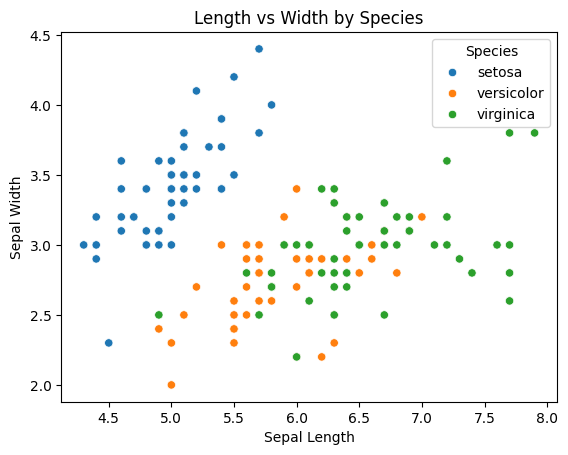

In [5]:
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=attention_df) # hue - group by
plt.title("Length vs Width by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Species")
plt.show()

## Histogram

<Axes: xlabel='sepal_length', ylabel='Count'>

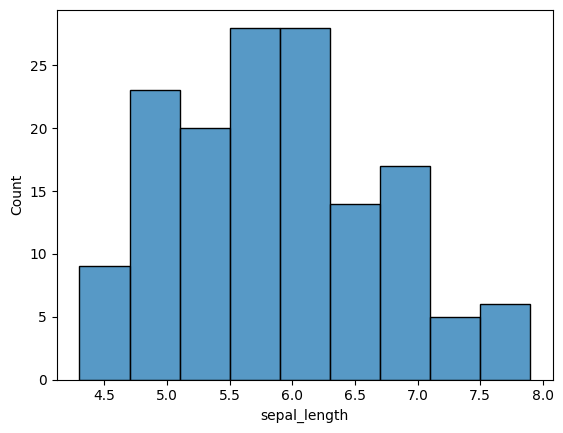

In [6]:
sns.histplot(x="sepal_length",data=attention_df)

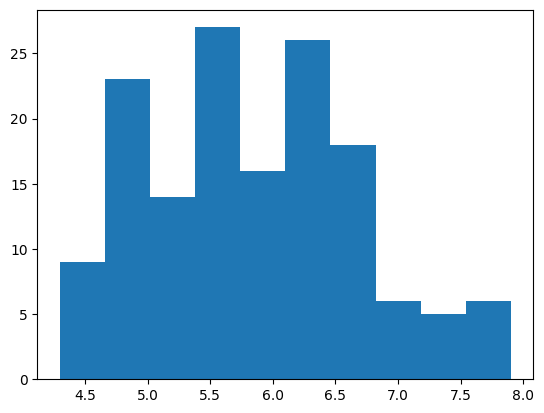

In [ ]:
plt.hist(attention_df['sepal_length']) # We have to feed the column directly into matplotlib as opposed to specifying which column in a dataframe with seaborn
plt.show()

## Boxplot

<img src="Media/box.png" alt="title" width="600">

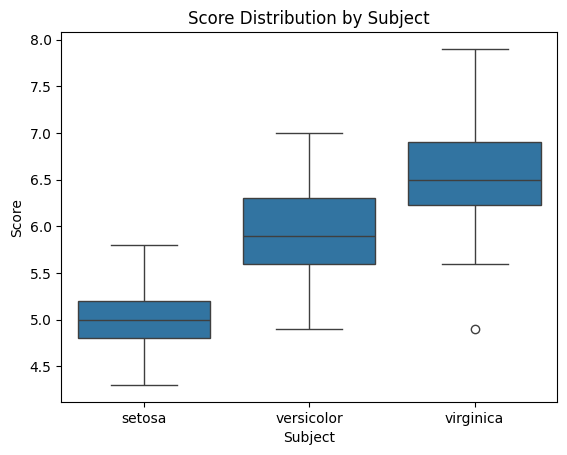

In [25]:
sns.boxplot(x="species", y="sepal_length", data=attention_df)
plt.title("Score Distribution by Subject")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()

C:\Users\camer\AppData\Local\Temp\ipykernel_18240\3188906859.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(subject_scores, labels=subjects)


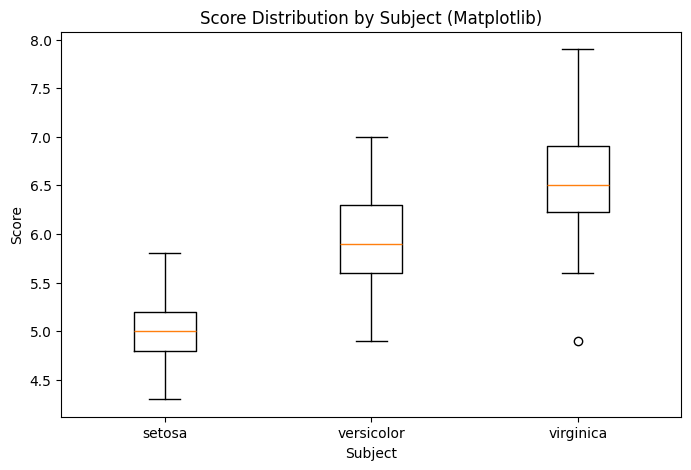

In [26]:
plt.figure(figsize=(8, 5))
subjects = attention_df["species"].unique()
subject_scores = [attention_df[attention_df["species"] == subj]["sepal_length"] for subj in subjects]
plt.boxplot(subject_scores, labels=subjects)
plt.title("Score Distribution by Subject (Matplotlib)")
plt.xlabel("Subject")
plt.ylabel("Score")
plt.show()

## Bar Plot

In [19]:
mean_df = attention_df.groupby("species", as_index=False).mean()
mean_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


<BarContainer object of 150 artists>

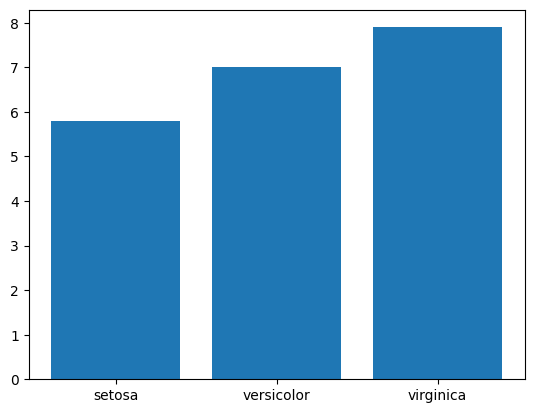

In [ ]:
plt.bar(x=attention_df['species'],height=attention_df['sepal_length'])
plt.show()

<Axes: xlabel='species', ylabel='sepal_length'>

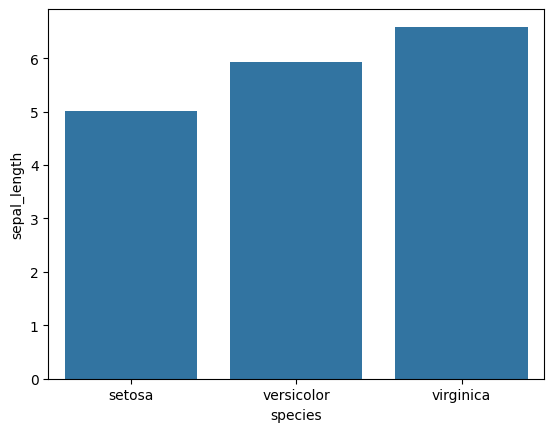

In [24]:
sns.barplot(x="species",y="sepal_length",data=mean_df)

In [25]:
df_melt = mean_df.melt(id_vars='species', 
                    value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                    var_name='measurement', 
                    value_name='value')

In [26]:
df_melt.head()

,species,measurement,value
0,setosa,sepal_length,5.006
1,versicolor,sepal_length,5.936
2,virginica,sepal_length,6.588
3,setosa,sepal_width,3.428
4,versicolor,sepal_width,2.770


<Axes: xlabel='measurement', ylabel='value'>

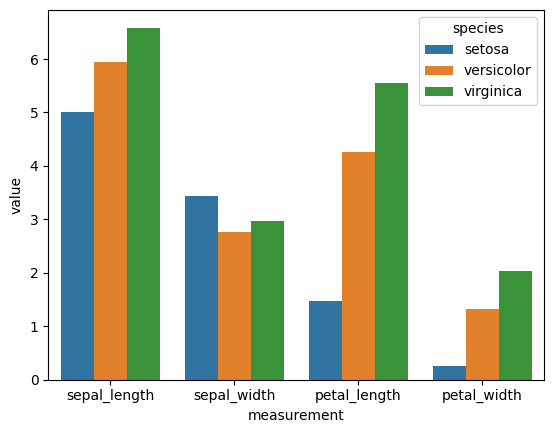

In [28]:
sns.barplot(data=df_melt, x='measurement', y='value', hue='species')

## Line Plots

In [ ]:
import random

# Generate a list of 10 random floats between 0 and 1
random_floats = [5*random.random()+67 for _ in range(10)]

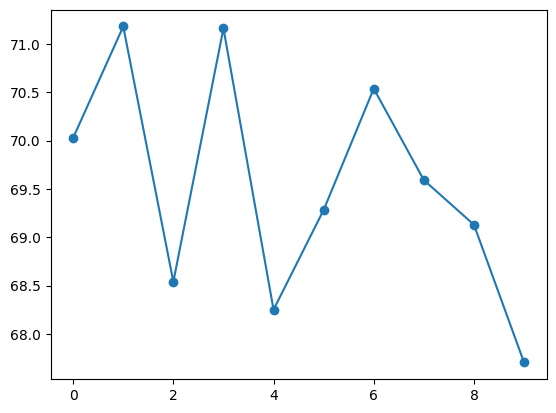

In [44]:
plt.plot(random_floats,'-o') # '-', 'o', '-o', 'x', etc
plt.show()

In [45]:
from scipy.interpolate import make_interp_spline
import numpy as np

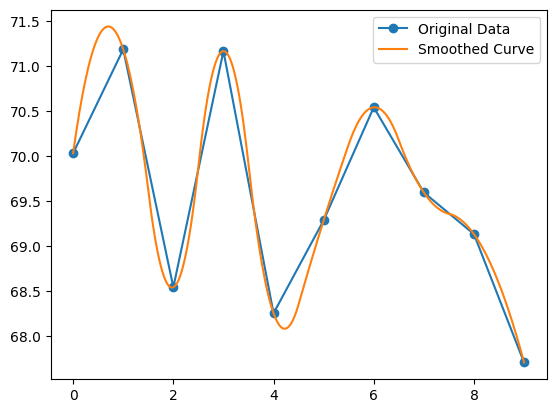

In [56]:
x = [i for i in range(10)]
x_smooth = np.linspace(x[0], x[-1], 300)

# B-spline interpolation
spline = make_interp_spline(x,random_floats, k=2)  # k=3 means cubic spline
y_smooth = spline(x_smooth)

# Plot
plt.plot(x, random_floats, '-o', label='Original Data')
plt.plot(x_smooth, y_smooth, label='Smoothed Curve')
plt.legend()
plt.show()

## Finishing Touches

For publications, make sure legends are not in the way and that you have appropriate title, x-axis labels and y-axis labels. 

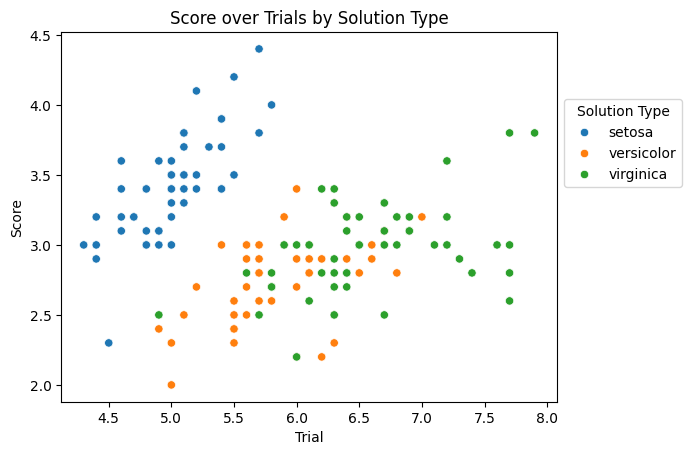

In [64]:
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=attention_df)
plt.title("Score over Trials by Solution Type")
plt.xlabel("Trial")
plt.ylabel("Score")
plt.legend(title="Solution Type",loc='center left', bbox_to_anchor=(1.0, .7))
plt.show()

Make sure figure is easily readable as well

Text(0.5, 0, 'Sepal Length')

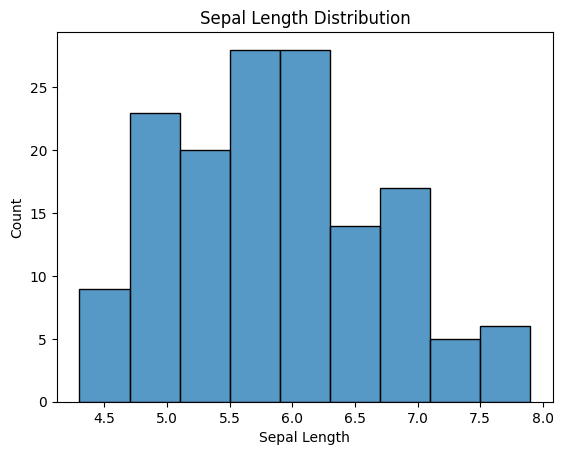

In [10]:
sns.histplot(x="sepal_length",data=attention_df)
plt.title("Sepal Length Distribution")
plt.xlabel("Sepal Length")